### K-Mean vs K-Means++ 

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [3]:
# Define Euclidean distance 
def distance(x1, x2):
    return math.sqrt(sum([x**2 for x in x1-x2]))

In [4]:
# Define a function to implement the KMeans algorithm
def Kmeans(X, k, plus = True):
    (n, d) = X.shape
    # Step 1. Choose k centers randomly
    if plus == True:
        C = X.sample(1)
        for i in range(1,k):
            d = [];
            for j in range(n):
                d.append(min([distance(X.values[j], C.values[k]) for k in range(i)]))
            p = [x**2 for x in d]
            p = [x/sum(p) for x in p]
            C = pd.DataFrame(np.concatenate([C.values, X.values[np.random.multinomial(1,p)==1]]))
    else:
        C = X.sample(k)
    
    old_label = np.ones(n)
    new_label = np.zeros(n)
    
    while sum(old_label != new_label) > 0:
        # Step 2. Assign labels for each sample
        old_label = new_label
        for i in range(n):
            d = [distance(X.values[i], C.values[j]) for j in range(k)]
            new_label[i] = d.index(min(d))
        # Step 3. Update the centers
        for j in range(k):
            C.values[j] = np.mean(X[new_label == j])
    XX = X.copy()
    XX['label'] = new_label
    return XX

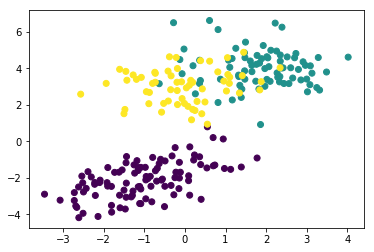

In [5]:
# Simulations
miu1 = np.array([-1,-2])
cov1 = np.matrix([[1,0.5], [0.5,1]])
X1 = np.random.multivariate_normal(miu1, cov1, 100)

miu2 = np.array([2,4])
cov2 = np.matrix([[1,0], [0,1]])
X2 = np.random.multivariate_normal(miu2, cov2, 80)

miu3 = np.array([0, 3])
cov3 = np.matrix([[1, 0.2], [0.2, 1]])
X3 = np.random.multivariate_normal(miu3, cov3, 60)

X = pd.DataFrame(np.concatenate([X1, X2, X3]), columns = ['x','y'])
X['label'] = np.concatenate([np.ones(100), np.ones(80)*2, np.ones(60)*3])
plt.scatter(X['x'], X['y'], c = X['label'])

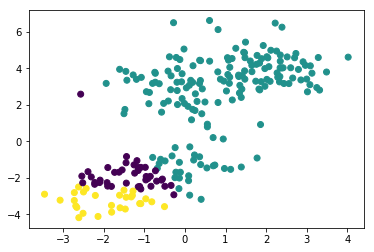

In [6]:
# KMeans
Y = Kmeans(X, 3, plus = False)
plt.scatter(Y['x'], Y['y'], c = Y['label'])

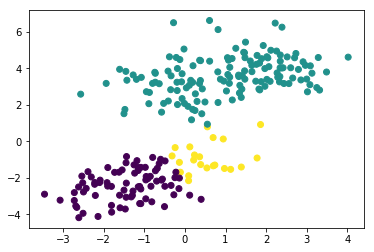

In [9]:
# KMeans++
Y = Kmeans(X, 3, plus = True)
plt.scatter(Y['x'], Y['y'], c = Y['label'])